In [1]:
import pandas as pd

In [2]:
arxiv_df = pd.read_csv("arxiv_publications.csv")

In [3]:
arxiv_df = arxiv_df[(arxiv_df.published.gt("2017"))&(arxiv_df.published.lt("2022-10"))].sort_values(by="published")[["published","url"]]

In [4]:
arxiv_df["published"] = pd.to_datetime(arxiv_df["published"])

In [5]:
arxiv_df = arxiv_df.set_index("published")

In [6]:
arxiv_df

,url
published,
2017-01-01 00:00:00+00:00,5
2017-02-01 00:00:00+00:00,3
2017-03-01 00:00:00+00:00,7
2017-04-01 00:00:00+00:00,3
2017-05-01 00:00:00+00:00,6
...,...
2022-05-01 00:00:00+00:00,30
2022-06-01 00:00:00+00:00,35
2022-07-01 00:00:00+00:00,50


In [7]:
github_df = pd.read_csv("github_sum_commits.csv")

In [8]:
github_df = github_df[github_df.commit_date.gt("2017")].sort_values(by="commit_date")

In [9]:
github_df["commit_date"] = pd.to_datetime(github_df["commit_date"])

In [10]:
github_df = github_df.set_index("commit_date")

In [11]:
github_df

,commits,repo_name
commit_date,,
2017-01-01 00:00:00+00:00,31,31
2017-02-01 00:00:00+00:00,5,5
2017-03-01 00:00:00+00:00,17,17
2017-04-01 00:00:00+00:00,14,14
2017-05-01 00:00:00+00:00,3,3
...,...,...
2022-05-01 00:00:00+00:00,733,733
2022-06-01 00:00:00+00:00,505,505
2022-07-01 00:00:00+00:00,466,466


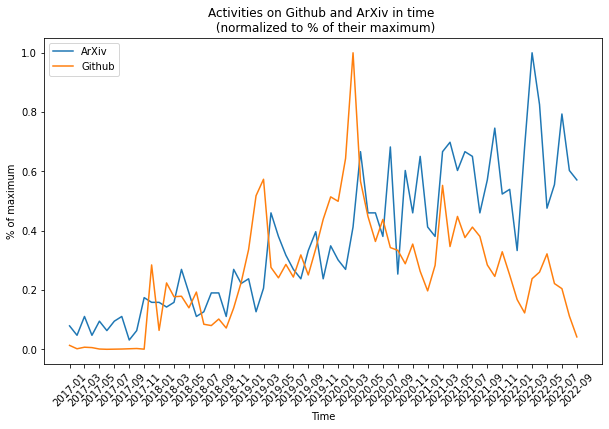

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(arxiv_df.url.values/arxiv_df.url.values.max(), label="ArXiv")
ax.plot(github_df.commits.values/github_df.commits.values.max(), label="Github")
ax.set_title("Activities on Github and ArXiv in time \n (normalized to % of their maximum)") 
samplemonths = list(range(0,len(github_df),2))
ax.set_xticks(ticks=samplemonths, labels=github_df.iloc[samplemonths].index.strftime("%Y-%m"))
plt.xticks(rotation = 45) 
ax.set_xlabel("Time")
ax.set_ylabel("% of maximum")
plt.gcf().set_size_inches(10, 6)
ax.legend()
plt.show()

In [13]:
arxiv_df.url.values

array([ 5,  3,  7,  3,  6,  4,  6,  7,  2,  4, 11, 10, 10,  9, 10, 17, 12,
        7,  8, 12, 12,  7, 17, 14, 15,  8, 13, 29, 24, 20, 17, 15, 21, 25,
       15, 22, 19, 17, 26, 42, 29, 29, 24, 43, 16, 38, 29, 41, 26, 24, 42,
       44, 38, 42, 41, 29, 36, 47, 33, 34, 21, 43, 63, 52, 30, 35, 50, 38,
       36])

In [14]:
len(arxiv_df.url.values)

69

In [15]:
len(github_df.commits.values)

69

In [16]:
github_df.commits.values

array([  31,    5,   17,   14,    3,    1,    2,    3,    5,    7,    2,
        648,  146,  510,  404,  408,  319,  440,  193,  183,  233,  164,
        318,  513,  766, 1179, 1305,  629,  549,  652,  555,  725,  571,
        772,  998, 1170, 1136, 1465, 2275, 1290, 1020,  828,  997,  781,
        760,  657,  808,  599,  449,  645, 1258,  789, 1020,  858,  938,
        867,  648,  560,  749,  570,  382,  280,  542,  593,  733,  505,
        466,  256,   96])

In [17]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(np.array([arxiv_df.url.values,github_df.commits.values]).T, maxlag=[7])


Granger Causality
number of lags (no zero) 7
ssr based F test:         F=2.3505  , p=0.0383  , df_denom=47, df_num=7
ssr based chi2 test:   chi2=21.7045 , p=0.0029  , df=7
likelihood ratio test: chi2=18.6098 , p=0.0095  , df=7
parameter F test:         F=2.3505  , p=0.0383  , df_denom=47, df_num=7


{7: ({'ssr_ftest': (2.3504835831493303, 0.038272642813509644, 47.0, 7),
   'ssr_chi2test': (21.704465427378924, 0.002856089768083763, 7),
   'lrtest': (18.609792367674288, 0.009501694663628919, 7),
   'params_ftest': (2.3504835831492916, 0.03827264281351247, 47.0, 7.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In [18]:
#Counter test for reverse granger, luckily it fails
grangercausalitytests(np.array([github_df.commits.values, arxiv_df.url.values ]).T, maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0700  , p=0.7922  , df_denom=65, df_num=1
ssr based chi2 test:   chi2=0.0732  , p=0.7867  , df=1
likelihood ratio test: chi2=0.0732  , p=0.7868  , df=1
parameter F test:         F=0.0700  , p=0.7922  , df_denom=65, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0065  , p=0.9935  , df_denom=62, df_num=2
ssr based chi2 test:   chi2=0.0141  , p=0.9930  , df=2
likelihood ratio test: chi2=0.0141  , p=0.9930  , df=2
parameter F test:         F=0.0065  , p=0.9935  , df_denom=62, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0394  , p=0.9894  , df_denom=59, df_num=3
ssr based chi2 test:   chi2=0.1323  , p=0.9877  , df=3
likelihood ratio test: chi2=0.1322  , p=0.9877  , df=3
parameter F test:         F=0.0394  , p=0.9894  , df_denom=59, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2592  , p=0.9028  , df_d

{1: ({'ssr_ftest': (0.06999515398720492, 0.7921809545439708, 65.0, 1),
   'ssr_chi2test': (0.07322569955584514, 0.7866967919411862, 1),
   'lrtest': (0.07318630134409432, 0.7867527956461337, 1),
   'params_ftest': (0.06999515398722263, 0.7921809545439498, 65.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.0065286234214389565, 0.9934933246351572, 62.0, 2),
   'ssr_chi2test': (0.014110250620529357, 0.9929697036614915, 2),
   'lrtest': (0.014108765014384517, 0.9929704412427122, 2),
   'params_ftest': (0.006528623421443376, 0.9934933246351537, 62.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.03942386912941666, 0.9894445982134875, 59.0, 3),
   'ssr_chi2test': (0.13230383199363557, 0.987697168370329, 3),
   'lrtest': (0.13217140058259247, 0.9877151514280849, 3),
   'params_ftest': (0.03942386912941901, 0.9894445982134866, 59.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.

In [19]:
#normalized granger
grangercausalitytests(np.array([arxiv_df.url.values/arxiv_df.url.values.max(),github_df.commits.values/github_df.commits.values.max()]).T, maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.3621  , p=0.0141  , df_denom=65, df_num=1
ssr based chi2 test:   chi2=6.6558  , p=0.0099  , df=1
likelihood ratio test: chi2=6.3498  , p=0.0117  , df=1
parameter F test:         F=6.3621  , p=0.0141  , df_denom=65, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7729  , p=0.0702  , df_denom=62, df_num=2
ssr based chi2 test:   chi2=5.9931  , p=0.0500  , df=2
likelihood ratio test: chi2=5.7400  , p=0.0567  , df=2
parameter F test:         F=2.7729  , p=0.0702  , df_denom=62, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8400  , p=0.1497  , df_denom=59, df_num=3
ssr based chi2 test:   chi2=6.1750  , p=0.1034  , df=3
likelihood ratio test: chi2=5.9030  , p=0.1164  , df=3
parameter F test:         F=1.8400  , p=0.1497  , df_denom=59, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3525  , p=0.2621  , df_d

{1: ({'ssr_ftest': (6.362116272655199, 0.014116255582533467, 65.0, 1),
   'ssr_chi2test': (6.655752408316208, 0.009883622831417352, 1),
   'lrtest': (6.349831447203883, 0.011739245094125536, 1),
   'params_ftest': (6.362116272655167, 0.014116255582533658, 65.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.7729040721625484, 0.07024119779212898, 62.0, 2),
   'ssr_chi2test': (5.993050736609379, 0.04996036098329086, 2),
   'lrtest': (5.73999866308867, 0.05669896448057825, 2),
   'params_ftest': (2.7729040721625386, 0.0702411977921295, 62.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.8400231338150632, 0.14974762661345525, 59.0, 3),
   'ssr_chi2test': (6.174992889752247, 0.10339998145570059, 3),
   'lrtest': (5.902966410565682, 0.11642774689840649, 3),
   'params_ftest': (1.840023133815073, 0.1497476266134536, 59.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.

In [20]:
#reverse normalized granger
grangercausalitytests(np.array([github_df.commits.values/github_df.commits.values.max(),arxiv_df.url.values/arxiv_df.url.values.max()]).T, maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0700  , p=0.7922  , df_denom=65, df_num=1
ssr based chi2 test:   chi2=0.0732  , p=0.7867  , df=1
likelihood ratio test: chi2=0.0732  , p=0.7868  , df=1
parameter F test:         F=0.0700  , p=0.7922  , df_denom=65, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0065  , p=0.9935  , df_denom=62, df_num=2
ssr based chi2 test:   chi2=0.0141  , p=0.9930  , df=2
likelihood ratio test: chi2=0.0141  , p=0.9930  , df=2
parameter F test:         F=0.0065  , p=0.9935  , df_denom=62, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0394  , p=0.9894  , df_denom=59, df_num=3
ssr based chi2 test:   chi2=0.1323  , p=0.9877  , df=3
likelihood ratio test: chi2=0.1322  , p=0.9877  , df=3
parameter F test:         F=0.0394  , p=0.9894  , df_denom=59, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2592  , p=0.9028  , df_d

{1: ({'ssr_ftest': (0.06999515398721234, 0.7921809545439708, 65.0, 1),
   'ssr_chi2test': (0.07322569955585292, 0.786696791941175, 1),
   'lrtest': (0.07318630134409432, 0.7867527956461337, 1),
   'params_ftest': (0.06999515398722149, 0.7921809545439498, 65.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.006528623421444269, 0.9934933246351503, 62.0, 2),
   'ssr_chi2test': (0.01411025062054084, 0.9929697036614858, 2),
   'lrtest': (0.014108765014384517, 0.9929704412427122, 2),
   'params_ftest': (0.006528623421446705, 0.9934933246351503, 62.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.03942386912941929, 0.9894445982134866, 59.0, 3),
   'ssr_chi2test': (0.1323038319936444, 0.9876971683703277, 3),
   'lrtest': (0.13217140058247878, 0.9877151514281003, 3),
   'params_ftest': (0.03942386912941869, 0.9894445982134866, 59.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0

Conclusions:
- Reverse granger luckily fails
- Unnormalized granger good at 7
- Normalized granger extremely good at 1
- Interestingly normalized granger recovers exact unnormalized at 7
- Normalized reverse granger luckily fails

In [21]:
google_trends_df = pd.read_csv("google_trends.csv")#, header=1)

google_trends_df = google_trends_df[google_trends_df.month.gt("2017")].sort_values(by="month")
google_trends_df["month"] = pd.to_datetime(google_trends_df["month"])
google_trends_df = google_trends_df.set_index("month")
google_trends_df

,search_freq
month,
2017-01-01,0
2017-02-01,0
2017-03-01,0
2017-04-01,0
2017-05-01,0
...,...
2022-05-01,82
2022-06-01,78
2022-07-01,77


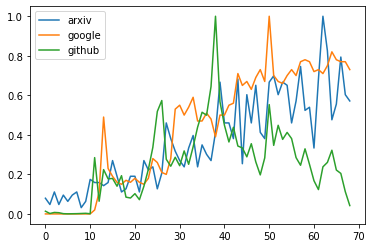

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(arxiv_df.url.values/arxiv_df.url.values.max(), label="arxiv")
ax.plot(google_trends_df.search_freq.values/google_trends_df.search_freq.values.max(), label="google")
ax.plot(github_df.commits.values/github_df.commits.values.max(), label="github")

ax.legend()
plt.show()

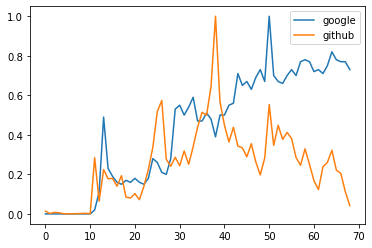

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
#ax.plot(arxiv_df.url.values/arxiv_df.url.values.max(), label="arxiv")
ax.plot(google_trends_df.search_freq.values/google_trends_df.search_freq.values.max(), label="google")
ax.plot(github_df.commits.values/github_df.commits.values.max(), label="github")

ax.legend()
plt.show()

In [24]:
#is it off by 1 bug or reality, that github is earlier???
#what is the downtrend in github at the end?

In [25]:
#normalized github vs gooogle granger
grangercausalitytests(np.array([github_df.commits.values/github_df.commits.values.max(),google_trends_df.search_freq.values/google_trends_df.search_freq.values.max()]).T, maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5271  , p=0.4704  , df_denom=65, df_num=1
ssr based chi2 test:   chi2=0.5514  , p=0.4577  , df=1
likelihood ratio test: chi2=0.5492  , p=0.4587  , df=1
parameter F test:         F=0.5271  , p=0.4704  , df_denom=65, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2717  , p=0.7630  , df_denom=62, df_num=2
ssr based chi2 test:   chi2=0.5873  , p=0.7455  , df=2
likelihood ratio test: chi2=0.5847  , p=0.7465  , df=2
parameter F test:         F=0.2717  , p=0.7630  , df_denom=62, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5263  , p=0.6659  , df_denom=59, df_num=3
ssr based chi2 test:   chi2=1.7664  , p=0.6223  , df=3
likelihood ratio test: chi2=1.7432  , p=0.6274  , df=3
parameter F test:         F=0.5263  , p=0.6659  , df_denom=59, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4217  , p=0.7923  , df_d

{1: ({'ssr_ftest': (0.5270772574489886, 0.4704443822500387, 65.0, 1),
   'ssr_chi2test': (0.5514039001004805, 0.4577446280780564, 1),
   'lrtest': (0.5491802784621882, 0.4586528254459361, 1),
   'params_ftest': (0.5270772574489961, 0.4704443822500387, 65.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.2717341298131705, 0.7629596859213604, 62.0, 2),
   'ssr_chi2test': (0.5872963450800782, 0.7455387463097682, 2),
   'lrtest': (0.5847372812827416, 0.7464932974764653, 2),
   'params_ftest': (0.2717341298131726, 0.7629596859213604, 62.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.526346608945129, 0.6659002596107814, 59.0, 3),
   'ssr_chi2test': (1.7663835351039923, 0.6222774319807034, 3),
   'lrtest': (1.7431597850824687, 0.6273813978552418, 3),
   'params_ftest': (0.5263466089451262, 0.6659002596107828, 59.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0.,

In [26]:
# google vs github reverse normalized granger
grangercausalitytests(np.array([google_trends_df.search_freq.values/google_trends_df.search_freq.values.max(),github_df.commits.values/github_df.commits.values.max()]).T, maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1005  , p=0.7522  , df_denom=65, df_num=1
ssr based chi2 test:   chi2=0.1051  , p=0.7457  , df=1
likelihood ratio test: chi2=0.1051  , p=0.7458  , df=1
parameter F test:         F=0.1005  , p=0.7522  , df_denom=65, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0571  , p=0.3536  , df_denom=62, df_num=2
ssr based chi2 test:   chi2=2.2848  , p=0.3191  , df=2
likelihood ratio test: chi2=2.2467  , p=0.3252  , df=2
parameter F test:         F=1.0571  , p=0.3536  , df_denom=62, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8550  , p=0.4696  , df_denom=59, df_num=3
ssr based chi2 test:   chi2=2.8692  , p=0.4122  , df=3
likelihood ratio test: chi2=2.8086  , p=0.4221  , df=3
parameter F test:         F=0.8550  , p=0.4696  , df_denom=59, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3192  , p=0.2741  , df_d

{1: ({'ssr_ftest': (0.10050977326826775, 0.752234804363561, 65.0, 1),
   'ssr_chi2test': (0.10514868588064935, 0.7457363697576944, 1),
   'lrtest': (0.10506747366156333, 0.7458311874697348, 1),
   'params_ftest': (0.10050977326827497, 0.752234804363561, 65.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.0571483981798304, 0.35362339726875447, 62.0, 2),
   'ssr_chi2test': (2.284804602517698, 0.31905164228504657, 2),
   'lrtest': (2.2467105281065756, 0.32518687430028537, 2),
   'params_ftest': (1.0571483981798298, 0.3536233972687558, 62.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.8549640230574205, 0.4695789936799124, 59.0, 3),
   'ssr_chi2test': (2.869201297718123, 0.41223447553762516, 3),
   'lrtest': (2.8085857943656265, 0.4220884920013682, 3),
   'params_ftest': (0.8549640230574217, 0.46957899367991074, 59.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0

Conclusion:
- Granger and reverse fails for Gihub and Google

In [27]:
import peakdetect

google_peaks = peakdetect.peakdetect(google_trends_df.search_freq.values/google_trends_df.search_freq.values.max(), google_trends_df.index, lookahead=3)#4, delta=0.1)

In [28]:
google_peaks

[[[numpy.datetime64('2018-02-01T00:00:00.000000000'), 0.49],
  [numpy.datetime64('2019-01-01T00:00:00.000000000'), 0.28],
  [numpy.datetime64('2019-10-01T00:00:00.000000000'), 0.59],
  [numpy.datetime64('2020-08-01T00:00:00.000000000'), 0.71],
  [numpy.datetime64('2021-03-01T00:00:00.000000000'), 1.0],
  [numpy.datetime64('2021-11-01T00:00:00.000000000'), 0.78],
  [numpy.datetime64('2022-05-01T00:00:00.000000000'), 0.82]],
 [[numpy.datetime64('2018-06-01T00:00:00.000000000'), 0.15],
  [numpy.datetime64('2019-04-01T00:00:00.000000000'), 0.2],
  [numpy.datetime64('2020-03-01T00:00:00.000000000'), 0.39],
  [numpy.datetime64('2020-11-01T00:00:00.000000000'), 0.63],
  [numpy.datetime64('2021-06-01T00:00:00.000000000'), 0.66],
  [numpy.datetime64('2022-03-01T00:00:00.000000000'), 0.71]]]

In [29]:
github_peaks = peakdetect.peakdetect(github_df.commits.values/github_df.commits.values.max(), github_df.index, lookahead=3)#, )#, look, delta)

In [30]:
github_peaks

[[[Timestamp('2017-12-01 00:00:00+0000', tz='UTC'), 0.28483516483516486],
  [Timestamp('2019-03-01 00:00:00+0000', tz='UTC'), 0.5736263736263736],
  [Timestamp('2020-03-01 00:00:00+0000', tz='UTC'), 1.0],
  [Timestamp('2021-03-01 00:00:00+0000', tz='UTC'), 0.552967032967033],
  [Timestamp('2022-05-01 00:00:00+0000', tz='UTC'), 0.3221978021978022]],
 [[Timestamp('2017-06-01 00:00:00+0000', tz='UTC'), 0.00043956043956043956],
  [Timestamp('2018-10-01 00:00:00+0000', tz='UTC'), 0.07208791208791208],
  [Timestamp('2019-05-01 00:00:00+0000', tz='UTC'), 0.2413186813186813],
  [Timestamp('2021-01-01 00:00:00+0000', tz='UTC'), 0.19736263736263737],
  [Timestamp('2022-02-01 00:00:00+0000', tz='UTC'), 0.12307692307692308]]]

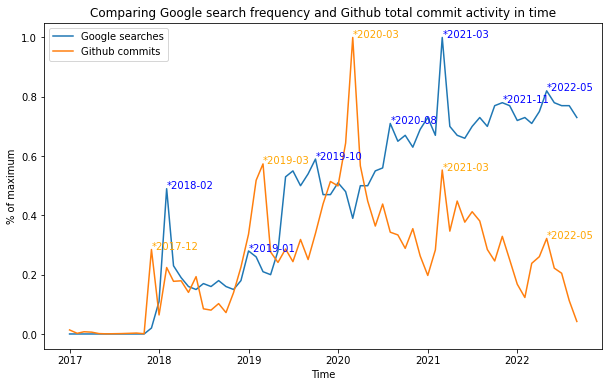

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

#ax = google_trends_df.search_freq.plot()
locs, labels=plt.xticks()

ax.plot(google_trends_df.index,google_trends_df.search_freq.values/google_trends_df.search_freq.values.max(), label="Google searches")
ax.plot(github_df.index,github_df.commits.values/github_df.commits.values.max(), label="Github commits")
#ax.plot(arxiv_df.index,arxiv_df.url.values/arxiv_df.url.values.max(), label="arxiv")


for peak in google_peaks[0]:
    ax.annotate("*"+str(peak[0])[:7],xy=(peak[0],peak[1]), fontsize=10, color="blue")


for peak in github_peaks[0]:
    ax.annotate("*"+str(peak[0])[:7],xy=(peak[0],peak[1]), fontsize=10, color="orange")

ax.set_title("Comparing Google search frequency and Github total commit activity in time")
ax.legend(loc='upper left')
ax.set_xlabel("Time")
ax.set_ylabel("% of maximum")
plt.gcf().set_size_inches(10, 6)
plt.show()

2018-02-01 https://variety.com/2018/digital/news/reddit-twitter-deepfake-ban-1202690627/

2019-01-01

2019-10-01 https://ai.facebook.com/blog/deepfake-detection-challenge/

2020-08-01 https://www.cnet.com/science/mit-releases-deepfake-video-of-nixon-announcing-nasa-apollo-11-disaster/
           https://www.theverge.com/2020/7/27/21339898/deepfake-audio-voice-clone-scam-attempt-nisos
           
2021-03-01 https://edition.cnn.com/videos/business/2021/03/02/tom-cruise-tiktok-deepfake-orig.cnn-business
           https://www.nytimes.com/2021/03/14/us/raffaela-spone-victory-vipers-deepfake.html

2021-11-01

2022-05-01

vs (maybe not)

https://en.wikipedia.org/wiki/Deepfake#Politics


Vajon miért csökken a Github aktivitás?

Nos, az emberek száma is csökken, akiket érdekel - lásd chart a github_analyzer notebookban.

Jobb lenne per repo megcsinálni a dolgot, mert az mutatná, hogy mennyire centralizálódik.

Ez egy jó mese elem lenne.

In [32]:
google_peaks[0]

[[numpy.datetime64('2018-02-01T00:00:00.000000000'), 0.49],
 [numpy.datetime64('2019-01-01T00:00:00.000000000'), 0.28],
 [numpy.datetime64('2019-10-01T00:00:00.000000000'), 0.59],
 [numpy.datetime64('2020-08-01T00:00:00.000000000'), 0.71],
 [numpy.datetime64('2021-03-01T00:00:00.000000000'), 1.0],
 [numpy.datetime64('2021-11-01T00:00:00.000000000'), 0.78],
 [numpy.datetime64('2022-05-01T00:00:00.000000000'), 0.82]]

In [33]:
pd.DataFrame(google_peaks[0])[0].diff()

0        NaT
1   334 days
2   273 days
3   305 days
4   212 days
5   245 days
6   181 days
Name: 0, dtype: timedelta64[ns]

18-20 havonta történik valamiféle kiugró esemény, ami rávilágít a deepfake témára, egy szinttel magasabbra emelve a közérdeklődést úgy, hogy annak általános szintje folyamatosan nő.

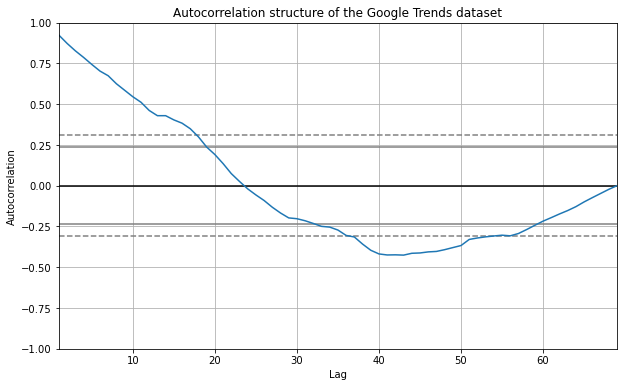

In [43]:
from pandas.plotting import autocorrelation_plot
fig = autocorrelation_plot(google_trends_df.search_freq)
fig.set_title("Autocorrelation structure of the Google Trends dataset")
plt.gcf().set_size_inches(10, 6)

plt.show()

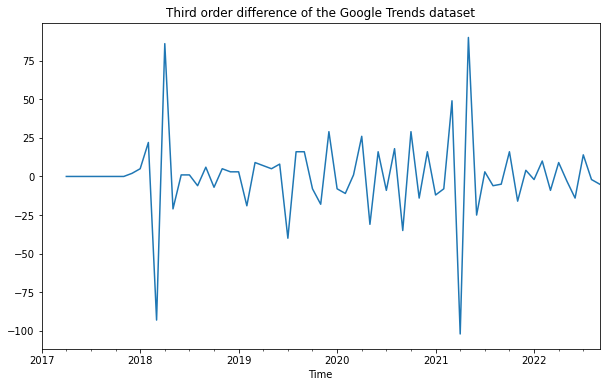

In [44]:
fig = google_trends_df.search_freq.diff().diff().diff().plot()
fig.set_title("Third order difference of the Google Trends dataset")
fig.set_xlabel("Time")
plt.gcf().set_size_inches(10, 6)

plt.show()

In [36]:
from statsmodels.tsa.stattools import adfuller

adfuller(google_trends_df.search_freq.diff().diff().diff().dropna())

(-5.780126406345915,
 5.149017212872468e-07,
 10,
 55,
 {'1%': -3.5552728880540942,
  '5%': -2.9157312396694217,
  '10%': -2.5956695041322315},
 418.43270623030867)

Bár egy idősorra nézve némi evidencia (mint például a Dickey-Fuller test, 0.005 alatti konfidencia értékkel) összegyűjthető egy adott idősor trendjének elemzésekor, így mondhatjuk, hogy exponenciális (3. diffrerencia) választásunkat adatokra alapozzuk, és ez jól illeszkedi az "exponenciálisan növekvő érdeklődés" narratívájához, ám megjegyzendő, hogy kvantitatív érvek hozhatók fel egy lineárisan növekvő trend mellett is. Mindezek ellenére mi most mégis bátran úgy döntünk, hogy exponenciális trendet feltételezve egy ARIMA(18,3,0) modellt felállítva illusztráljuk a növekvő közérdeklődés jövőjét.

/home/alatus/anaconda3/envs/10_days_AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/alatus/anaconda3/envs/10_days_AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/alatus/anaconda3/envs/10_days_AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


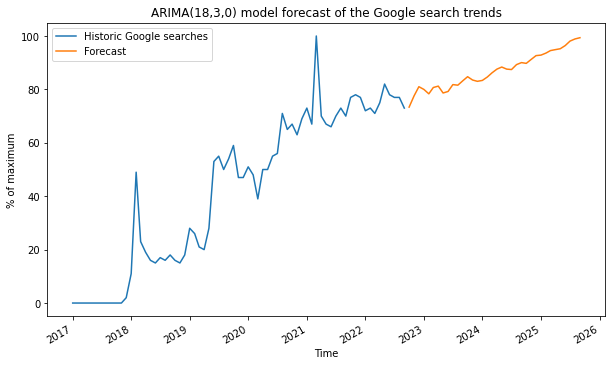

In [136]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(google_trends_df.search_freq, order=(18,3,0)).fit()
forecast = model.forecast(36)

fig, ax = plt.subplots()
ax.plot(google_trends_df.index,google_trends_df.search_freq.values, label="Historic Google searches")

forecast.plot(label="Forecast")
plt.legend()


ax.set_title("ARIMA(18,3,0) model forecast of the Google search trends")

ax.set_xlabel("Time")
ax.set_ylabel("% of maximum")
plt.gcf().set_size_inches(10, 6)
plt.show()

/home/alatus/anaconda3/envs/10_days_AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/alatus/anaconda3/envs/10_days_AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/alatus/anaconda3/envs/10_days_AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:>

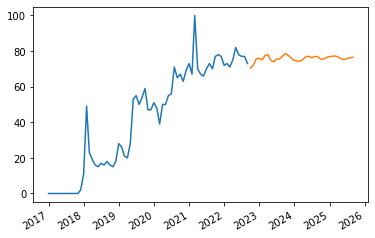

In [34]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(google_trends_df.search_freq, order=(18,1,0)).fit()
forecast = model.forecast(36)

fig, ax = plt.subplots()
ax.plot(google_trends_df.index,google_trends_df.search_freq.values, label="Google searches")

forecast.plot()

In [35]:
forecast

2022-10-01    70.477783
2022-11-01    72.052943
2022-12-01    75.690832
2023-01-01    75.927619
2023-02-01    75.078105
2023-03-01    77.394411
2023-04-01    78.095941
2023-05-01    74.865080
2023-06-01    73.912208
2023-07-01    75.518494
2023-08-01    75.519166
2023-09-01    77.227259
2023-10-01    78.638438
2023-11-01    77.454251
2023-12-01    75.926724
2024-01-01    74.716126
2024-02-01    74.353018
2024-03-01    74.347606
2024-04-01    75.382002
2024-05-01    76.984369
2024-06-01    76.953329
2024-07-01    76.323602
2024-08-01    76.964437
2024-09-01    76.787044
2024-10-01    75.403906
2024-11-01    75.542339
2024-12-01    76.488664
2025-01-01    76.863974
2025-02-01    77.127313
2025-03-01    77.207747
2025-04-01    76.680056
2025-05-01    75.636702
2025-06-01    75.233741
2025-07-01    75.763560
2025-08-01    76.180682
2025-09-01    76.562674
Freq: MS, Name: predicted_mean, dtype: float64

Látható, hogy ha a már fentebb említett kb másfél évenként bekövetkező "átütő híresemény" nem is következik be, akkoris folyamatos növekedést prognosztizálhatunk a deepfake technológia iránti közérdeklődésben.

In [139]:
window_size = 18

from sklearn.model_selection import train_test_split

def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)


rolled_data = rolling_window(google_trends_df.search_freq.values, window_size+1)

rolled_train_data, rolled_test_data = train_test_split(rolled_data, test_size=0.1, shuffle=False)

rolled_train_y = rolled_train_data[:,window_size]
rolled_train_x = rolled_train_data[:,:window_size]

rolled_test_y = rolled_test_data[:,window_size]
rolled_test_x = rolled_test_data[:,:window_size]


In [37]:
#!pip install --upgrade --force-reinstall tensorflow

In [38]:
#!pip install --upgrade --force-reinstall keras

In [39]:
#!pip install --upgrade --force-reinstall tensorflow-addons

  Using cached tensorflow_addons-0.18.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.13.3
    Uninstalling typeguard-2.13.3:
      Successfully uninstalled typeguard-2.13.3
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.18.0
    Uninstalling tensorflow-addons-0.18.0:
      Successfully uninstalled tensorflow-addons-0.18.0


In [40]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

 #import tensorflow.keras as keras
#import tensorflow_addons as tfa


tf.keras.backend.clear_session()

# Parameters
############

hidden_1_size = 17
hidden_2_size = 9

training_epochs = 1000
learning_rate = 0.01
l1_lambda = 0.00015

# Model
#######

inputs = Input(shape=(window_size,))

# Hidden layers

hidden_output_1 = Dense(hidden_1_size, activation='relu', kernel_regularizer=l1(l1_lambda), bias_regularizer=l1(l1_lambda))(inputs)
hidden_output_2 = Dense(hidden_2_size, activation='relu', kernel_regularizer=l1(l1_lambda), bias_regularizer=l1(l1_lambda))(hidden_output_1)

# Prediction layer
predictions = Dense(1, activation='linear')(hidden_output_2)


# Full model
model = Model(inputs=inputs, outputs=predictions)

# Optimizer
####################

optimizer = Adam(lr=learning_rate)
#radam = tfa.optimizers.RectifiedAdam()
#ranger = tfa.optimizers.Lookahead(radam, sync_period=6, slow_step_size=0.5)
#optimizer = ranger
 

# Compilation and fitting 
#########################

model.compile(optimizer=optimizer, loss='mean_squared_error')

saver_callback = tf.keras.callbacks.ModelCheckpoint("model.hdf5", save_only_best=True)

history = model.fit(x=rolled_train_x, 
                    y=rolled_train_y,
                    validation_data=(rolled_test_x,rolled_test_y),
                    epochs=training_epochs,
                    batch_size=None,
                    callbacks=[saver_callback])

2022-09-22 18:23:06.875045: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-09-22 18:23:06.877686: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-22 18:23:06.884022: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-09-22 18:23:07.283494: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-09-22 18:23:07.326896: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2803200000 Hz


Epoch 1/1000
2/2 [==============================] - 2s 590ms/step - loss: 1105.4048 - val_loss: 26.3436
Epoch 2/1000
2/2 [==============================] - 0s 137ms/step - loss: 199.0380 - val_loss: 2470.9885
Epoch 3/1000
2/2 [==============================] - 0s 143ms/step - loss: 700.7001 - val_loss: 697.9859
Epoch 4/1000
2/2 [==============================] - 0s 137ms/step - loss: 189.4401 - val_loss: 169.9138
Epoch 5/1000
2/2 [==============================] - 0s 132ms/step - loss: 142.7084 - val_loss: 42.4846
Epoch 6/1000
2/2 [==============================] - 0s 123ms/step - loss: 161.6158 - val_loss: 54.2513
Epoch 7/1000
2/2 [==============================] - 0s 132ms/step - loss: 151.8824 - val_loss: 207.6769
Epoch 8/1000
2/2 [==============================] - 0s 149ms/step - loss: 124.1788 - val_loss: 325.6957
Epoch 9/1000
2/2 [==============================] - 0s 150ms/step - loss: 120.1537 - val_loss: 201.4932
Epoch 10/1000
2/2 [==============================] - 0s 151ms/ste

2/2 [==============================] - 0s 144ms/step - loss: 21.2684 - val_loss: 68.1154
Epoch 160/1000
2/2 [==============================] - 0s 140ms/step - loss: 17.7276 - val_loss: 70.2954
Epoch 161/1000
2/2 [==============================] - 0s 135ms/step - loss: 18.2001 - val_loss: 42.2712
Epoch 162/1000
2/2 [==============================] - 0s 147ms/step - loss: 18.1676 - val_loss: 25.0875
Epoch 163/1000
2/2 [==============================] - 0s 135ms/step - loss: 20.5719 - val_loss: 33.3533
Epoch 164/1000
2/2 [==============================] - 0s 135ms/step - loss: 20.1107 - val_loss: 51.9575
Epoch 165/1000
2/2 [==============================] - 0s 134ms/step - loss: 16.8263 - val_loss: 33.5446
Epoch 166/1000
2/2 [==============================] - 0s 162ms/step - loss: 19.6516 - val_loss: 62.3408
Epoch 167/1000
2/2 [==============================] - 0s 133ms/step - loss: 18.9323 - val_loss: 31.8446
Epoch 168/1000
2/2 [==============================] - 0s 134ms/step - loss: 16.

Epoch 318/1000
2/2 [==============================] - 0s 131ms/step - loss: 5.7834 - val_loss: 20.5411
Epoch 319/1000
2/2 [==============================] - 0s 153ms/step - loss: 4.8299 - val_loss: 50.6417
Epoch 320/1000
2/2 [==============================] - 0s 185ms/step - loss: 7.1383 - val_loss: 21.5134
Epoch 321/1000
2/2 [==============================] - 0s 133ms/step - loss: 4.3323 - val_loss: 21.0874
Epoch 322/1000
2/2 [==============================] - 0s 146ms/step - loss: 4.6913 - val_loss: 40.5976
Epoch 323/1000
2/2 [==============================] - 0s 170ms/step - loss: 8.1542 - val_loss: 28.2638
Epoch 324/1000
2/2 [==============================] - 0s 90ms/step - loss: 5.4308 - val_loss: 31.8522
Epoch 325/1000
2/2 [==============================] - 0s 154ms/step - loss: 3.1334 - val_loss: 35.3967
Epoch 326/1000
2/2 [==============================] - 0s 114ms/step - loss: 4.5631 - val_loss: 23.1742
Epoch 327/1000
2/2 [==============================] - 0s 181ms/step - loss

2/2 [==============================] - 0s 154ms/step - loss: 1.4642 - val_loss: 41.3774
Epoch 477/1000
2/2 [==============================] - 0s 144ms/step - loss: 2.3681 - val_loss: 21.3241
Epoch 478/1000
2/2 [==============================] - 0s 105ms/step - loss: 2.1045 - val_loss: 25.9814
Epoch 479/1000
2/2 [==============================] - 0s 145ms/step - loss: 1.0010 - val_loss: 32.8938
Epoch 480/1000
2/2 [==============================] - 0s 146ms/step - loss: 0.9479 - val_loss: 23.9916
Epoch 481/1000
2/2 [==============================] - 0s 136ms/step - loss: 1.5216 - val_loss: 28.1286
Epoch 482/1000
2/2 [==============================] - 0s 149ms/step - loss: 0.8361 - val_loss: 26.4530
Epoch 483/1000
2/2 [==============================] - 0s 153ms/step - loss: 0.6651 - val_loss: 22.4192
Epoch 484/1000
2/2 [==============================] - 0s 172ms/step - loss: 0.8927 - val_loss: 36.5109
Epoch 485/1000
2/2 [==============================] - 0s 150ms/step - loss: 1.8799 - val

Epoch 556/1000
2/2 [==============================] - 0s 129ms/step - loss: 0.7820 - val_loss: 40.0719
Epoch 557/1000
2/2 [==============================] - 0s 130ms/step - loss: 1.5934 - val_loss: 20.7408
Epoch 558/1000
2/2 [==============================] - 0s 86ms/step - loss: 1.1068 - val_loss: 30.9143
Epoch 559/1000
2/2 [==============================] - 0s 124ms/step - loss: 0.7589 - val_loss: 28.1511
Epoch 560/1000
2/2 [==============================] - 0s 184ms/step - loss: 0.4978 - val_loss: 22.9274
Epoch 561/1000
2/2 [==============================] - 0s 161ms/step - loss: 0.9445 - val_loss: 32.4322
Epoch 562/1000
2/2 [==============================] - 0s 220ms/step - loss: 0.8172 - val_loss: 27.1749
Epoch 563/1000
2/2 [==============================] - 0s 140ms/step - loss: 1.0449 - val_loss: 30.1740
Epoch 564/1000
2/2 [==============================] - 0s 145ms/step - loss: 0.6469 - val_loss: 27.1040
Epoch 565/1000
2/2 [==============================] - 0s 166ms/step - loss

2/2 [==============================] - 0s 130ms/step - loss: 1.9200 - val_loss: 32.2202
Epoch 715/1000
2/2 [==============================] - 0s 136ms/step - loss: 1.3221 - val_loss: 33.2062
Epoch 716/1000
2/2 [==============================] - 0s 135ms/step - loss: 1.1526 - val_loss: 25.9809
Epoch 717/1000
2/2 [==============================] - 0s 126ms/step - loss: 0.9710 - val_loss: 23.9932
Epoch 718/1000
2/2 [==============================] - 0s 122ms/step - loss: 0.7409 - val_loss: 21.8712
Epoch 719/1000
2/2 [==============================] - 0s 126ms/step - loss: 1.5735 - val_loss: 43.2455
Epoch 720/1000
2/2 [==============================] - 0s 138ms/step - loss: 2.0224 - val_loss: 22.0894
Epoch 721/1000
2/2 [==============================] - 0s 122ms/step - loss: 1.1529 - val_loss: 22.6252
Epoch 722/1000
2/2 [==============================] - 0s 89ms/step - loss: 1.6700 - val_loss: 28.2488
Epoch 723/1000
2/2 [==============================] - 0s 164ms/step - loss: 1.1572 - val_

2/2 [==============================] - 0s 124ms/step - loss: 0.3447 - val_loss: 23.0127
Epoch 873/1000
2/2 [==============================] - 0s 144ms/step - loss: 0.4723 - val_loss: 32.4296
Epoch 874/1000
2/2 [==============================] - 0s 128ms/step - loss: 0.6188 - val_loss: 25.7030
Epoch 875/1000
2/2 [==============================] - 0s 137ms/step - loss: 0.4783 - val_loss: 30.5545
Epoch 876/1000
2/2 [==============================] - 0s 132ms/step - loss: 0.4320 - val_loss: 22.9654
Epoch 877/1000
2/2 [==============================] - 0s 137ms/step - loss: 0.7055 - val_loss: 27.7210
Epoch 878/1000
2/2 [==============================] - 0s 152ms/step - loss: 0.5126 - val_loss: 32.2522
Epoch 879/1000
2/2 [==============================] - 0s 96ms/step - loss: 0.3075 - val_loss: 22.3772
Epoch 880/1000
2/2 [==============================] - 0s 76ms/step - loss: 0.7864 - val_loss: 35.8758
Epoch 881/1000
2/2 [==============================] - 0s 168ms/step - loss: 0.9625 - val_l

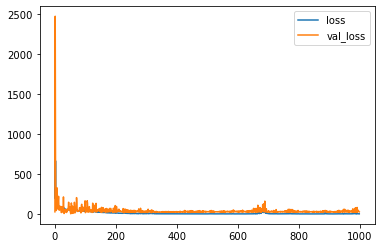

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

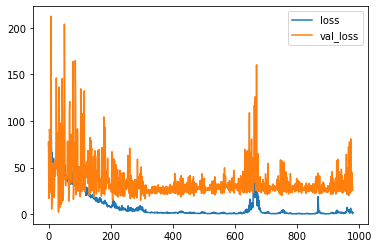

In [42]:
plt.plot(history.history["loss"][20:], label="loss")
plt.plot(history.history["val_loss"][20:], label="val_loss")
plt.legend()
plt.show()

In [43]:
print("The minimum for the val_loss is at epoch:",np.array(history.history["val_loss"]).argmin()+1)

The minimum for the val_loss is at epoch: 53


In [ ]:
np.array(history.history["val_loss"]).min()

In [137]:
import tensorflow as tf

best_model = tf.keras.models.load_model("good_model.hdf5")

2022-10-06 21:05:34.939691: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-06 21:05:34.947072: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-06 21:05:34.953848: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [140]:
from datetime import timedelta

train_data, test_data = train_test_split(google_trends_df, test_size=0.1, shuffle=False)

train_predictions = best_model.predict(rolled_train_x)
test_predictions  = best_model.predict(rolled_test_x)


out_layer_result_train = pd.Series(train_predictions.flatten())
out_layer_result_test = pd.Series(test_predictions.flatten())

idx = train_data.index[window_size:]
idx = list(idx)
idx.append(train_data.index[-1]+timedelta(days=30))

# Don't ask why this index shit is necessary :-(

out_layer_result_train.index = pd.Index(idx)

out_layer_result_test.index =test_data.index[1:] 

2022-10-06 21:06:15.101606: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-10-06 21:06:15.152276: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2803200000 Hz


In [141]:
def rolling_predict(model, start_window, steps=36):
    
    result = np.zeros(steps)
    
    prediction  = model.predict(start_window.reshape(1,-1))
    
    result[0] = prediction
    
    window = start_window.reshape(1,-1)
    
    for step in range(steps-1):
        window = np.roll(window, shift=-1)
        window[0,-1] = prediction
        prediction  = model.predict(window)
        result[step+1] = prediction
    return result

rolling_prediction = rolling_predict(best_model, rolled_test_x[-1])

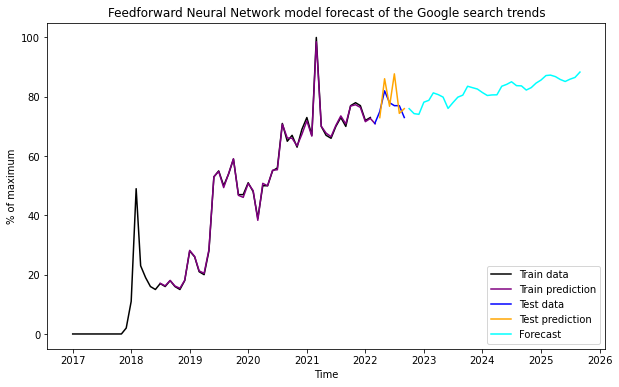

In [150]:
plt.close()
fig, ax = plt.subplots()
ax.plot(train_data["search_freq"], label="Train data", color="black")
ax.plot(out_layer_result_train, label="Train prediction", color="purple")
ax.plot(test_data["search_freq"], label="Test data", color="blue")
ax.plot(out_layer_result_test, label="Test prediction", color="orange")
ax.plot(forecast.index,rolling_prediction, label="Forecast", color="cyan")

ax.set_title("Feedforward Neural Network model forecast of the Google search trends")
ax.legend(loc='lower right')
ax.set_xlabel("Time")
ax.set_ylabel("% of maximum")
plt.gcf().set_size_inches(10, 6)
plt.show()
plt.show()

# Következtetések:
- 2017-től robant be a téma
- A publikációk erősen egyűttjárnak az opensource tevékenységgel (Granger okság publikációk és Github aktivitás között)
- A széles közönség érdeklődése nem azonnal követi a technológiai változásokat, hanem akár 18-20 hónap késéssel reagál (lásd még csúcs elemzés)
- A közérdeklődés több modell szerint is folyamatosan nőni fog, ám a kiugró érdeklődési csúcsokat csak "külső" faktorok, azaz valamiféle nagyközönség számára releváns hírek, közéelti vagy politikai események határozzák meg. Magyarul: addig nem fókuszál a témára széles körű figyelem, míg valami "áttörő" hír/botrány nem történik.
- A tudományos kutatás aktvitási szintje a témában továbbra is magas, mind a deepfake-ek létrehozására alkamas modellek (pl genratív vizuális modellek) terén, mind a deepfake felismerés terén
- Az open source aktivitás azonban változóban van, a széles körű, ám felszínesebb érdeklődés (pl egyetemi hallgatók, gépi tanulást elsajátítani kívánó tanulók) érdeklődése alábbhagyni látszik - mint azt az általános github aktivitás, az aktív repok számának és az egyedi aktív felhasználók számának folyamatos csökkenése is mutatja.
- A deepfake létrehozás kvázi standard megoldások / szoftver könyvtárak köré csoportosul, várhatóan kitermelve a téma specializált szakembereit. Másként modva: ez is csak egy szakma lesz.


## Újabb lökések az ismertségben

A téma elfogasdottságához és legitimitásához sokat hozzátesz [Bruce Willis lépése](https://www.engadget.com/bruce-willis-deepfake-celebrity-rights-192200856.html), mellyel átruházta a képmásához fűződő jogokat a [Deepcake](https://deepcake.io/] nevű cégre, mely kifejezetten deepfake technológiával foglalkozik, és nemrég egy orosz reklámban alkotta újra Willis karakterét anélkül, hogy a színésznek fizikai valójában szerepelnie kellett volna. A színész döntése érthető, mivel afáziában szenved, egy neurológiai betegségben, ami súlyosan korlátozza a kommunikáció képességét, így kénytelen visszavonulni az aktív szerepléstől. Ez az első eset, melyben egy híresség örökségét kezelő jogi személy kifejezetten a képmáshoz való jogot, ezen belül is a digitális reprodukció lehetőségét ilyen központi módon kezeli, megnyitva evvel annak kapuit, hogy szórakoztatóipar tulajdonképp az adott hírességek képét jelenlétüktől permanensen elváló módon kezelje, értékesítse, felhasználja, őket jelenlétük nélkül legálisan és nagy mennyiségben szerepeltesse.

A fenti "ismertségi modellek" szemszögéből vizsgálva Willis lépése egy korábbiakhoz hasonló "külső lökés" lehet, mely átlépve a szélesebb közönség ingerküszöbét egy újabb "szintlépéshez" vezethet a deepfake technológia közismertségében.


## Újabb technológiai áttörések és széleskörű ismertség

diffúziós modellek ->

meglepően gyors médiavisszhang, immáron külső lökés nélkül, megfigyelhető, hogy az opensource közösség és a szélesebb közönség érdeklődésének ritmusa, "csúcspontjai" között korábban megfigyelhető közeledés új szintre lépett, a deepfake-ek létrehozására is alkalmas generatív képi techológiák előrelépései már önmagukban is hírértéket képviselnek, nem kell valamiflée szélesebb közönséget is érintő közéleti botrány vagy hír ahhoz, hogy a képi techológiák egy egy komoly újítása már a szélesebb körű nyilvánosság érdeklődését is felkeltse. Egyszerűbben fogalmazva: már elegen tudják, mi ez és már önmagában is érdekes, nem csak Bruce Willis vagy Donad Trump miatt. Tudománytörténeti szenmpontból érdekes élőben figyelni egy techológia társadalmi elterjedését, melynek evvel egy  újabb állomásához érkeztünk.



# News and media:

https://www.youtube.com/watch?v=Wrald_EZgDQ&feature=youtu.be

https://youtu.be/lj8qofm4n4o

Months comment https://youtu.be/NiJeB2NJy1A

    https://www.engadget.com/bruce-willis-deepfake-celebrity-rights-192200856.html

https://edition.cnn.com/2022/09/30/tech/image-generating-ai-publicly-available/index.html

https://makeavideo.studio/

https://paperswithcode.com/sota/image-generation-on-cifar-10

